In [1]:
pip install numpy matplotlib scikit-learn


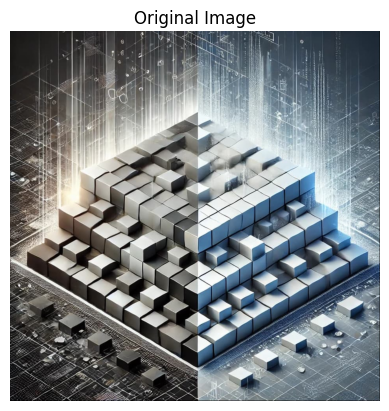

Розміри зображення: Height=941, Width=941, Channels=3


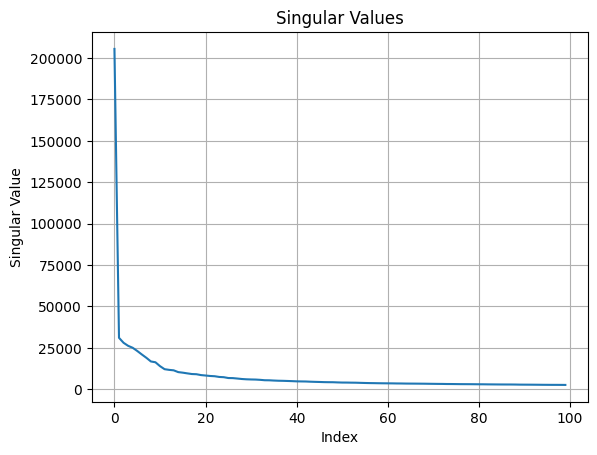

Reconstruction Error: 249.25231678951667


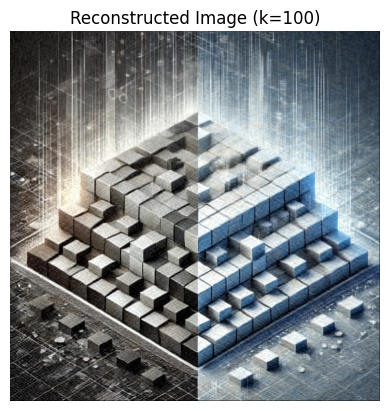

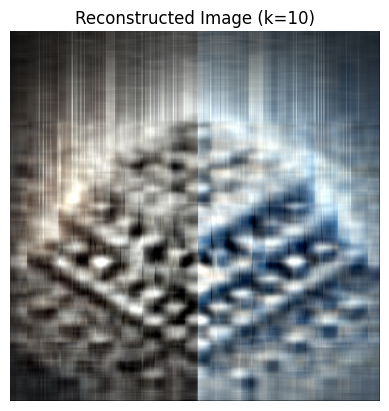

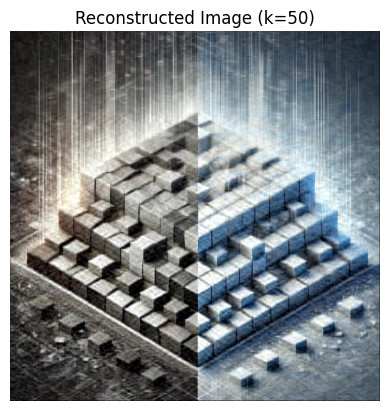

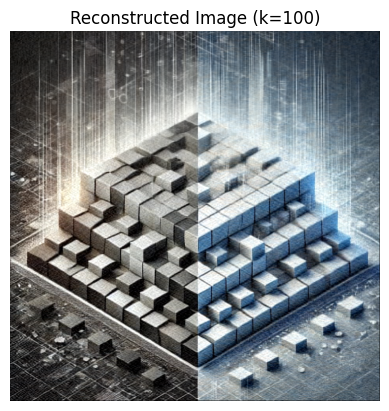

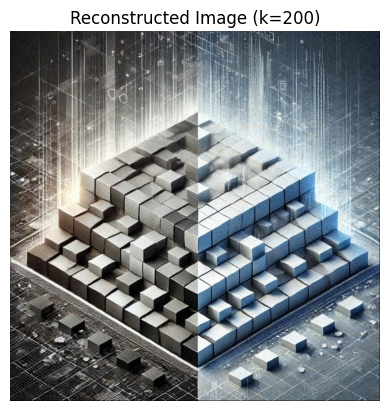


1. Вплив кількості сингулярних значень (k) на якість реконструкції:

- У ході експериментів було помічено, що якість реконструкції покращується зі збільшенням кількості використаних сингулярних значень. Це підтверджується зниженням помилки реконструкції (MSE), що є основним показником збереження інформації у стислому зображенні.

- Однак після досягнення певного значення k (наприклад, k=200) покращення якості стає менш помітним, оскільки значущість додаткових сингулярних значень суттєво зменшується.

2. Баланс між стисненням і якістю:

- Використання меншого k дозволяє суттєво зменшити розмір даних, однак це супроводжується видимими втратами візуальної якості. Наприклад, при k=10 зображення стає сильно розмитим.

- При збільшенні k до 100 або 200 втрата якості стає майже непомітною для людського ока, а отримане зображення добре відповідає оригіналу.

3. Ефективність методу SVD:

- Метод SVD дозволяє ефективно стиснути зображення, зберігаючи основну частину візуальної інформації. Це мо

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.decomposition import TruncatedSVD

# 1. Підготовка зображень
image_path = 'grey_01.jpg'
image = imread(image_path)

# 2. Виведення зображення
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')
plt.show()

# 3. Визначення розміру зображення
height, width, channels = image.shape
print(f'Розміри зображення: Height={height}, Width={width}, Channels={channels}')

# 4. Перетворення зображення у 2D-матрицю
flat_image = image.reshape(-1, width * channels)

# 5. Застосування SVD декомпозиції
U, S, Vt = np.linalg.svd(flat_image, full_matrices=False)

# 6. Візуалізація перших k значень з матриці Σ
k = 100
plt.plot(np.arange(k), S[:k])
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid()
plt.show()

# 7. Усічений SVD для стиснення зображення
svd = TruncatedSVD(n_components=k)
truncated_image = svd.fit_transform(flat_image)

# Відновлення зображення
reconstructed_image = svd.inverse_transform(truncated_image)

# 8. Оцінка помилки реконструкції
reconstruction_error = np.mean(np.square(reconstructed_image - flat_image))
print(f'Reconstruction Error: {reconstruction_error}')

# 9. Зміна форми в 3D для візуалізації
reconstructed_image = reconstructed_image.reshape(height, width, channels)
reconstructed_image = np.clip(reconstructed_image, 0, 255).astype('uint8')

plt.imshow(reconstructed_image)
plt.axis('off')
plt.title(f'Reconstructed Image (k={k})')
plt.show()

# 10. Експерименти з різними значеннями k
for k in [10, 50, 100, 200]:
    svd = TruncatedSVD(n_components=k)
    truncated_image = svd.fit_transform(flat_image)
    reconstructed_image = svd.inverse_transform(truncated_image)
    reconstructed_image = reconstructed_image.reshape(height, width, channels)
    reconstructed_image = np.clip(reconstructed_image, 0, 255).astype('uint8')

    plt.imshow(reconstructed_image)
    plt.axis('off')
    plt.title(f'Reconstructed Image (k={k})')
    plt.show()

# Висновок
print("""
1. Вплив кількості сингулярних значень (k) на якість реконструкції:

- У ході експериментів було помічено, що якість реконструкції покращується зі збільшенням кількості використаних сингулярних значень. Це підтверджується зниженням помилки реконструкції (MSE), що є основним показником збереження інформації у стислому зображенні.

- Однак після досягнення певного значення k (наприклад, k=200) покращення якості стає менш помітним, оскільки значущість додаткових сингулярних значень суттєво зменшується.

2. Баланс між стисненням і якістю:

- Використання меншого k дозволяє суттєво зменшити розмір даних, однак це супроводжується видимими втратами візуальної якості. Наприклад, при k=10 зображення стає сильно розмитим.

- При збільшенні k до 100 або 200 втрата якості стає майже непомітною для людського ока, а отримане зображення добре відповідає оригіналу.

3. Ефективність методу SVD:

- Метод SVD дозволяє ефективно стиснути зображення, зберігаючи основну частину візуальної інформації. Це може бути корисним для зменшення об'єму даних, які необхідно передавати або зберігати, наприклад, у системах обробки зображень або підготовки даних для машинного навчання.

4. Рекомендації:

- Оптимальне значення k варто обирати, враховуючи компроміс між якістю реконструкції та обсягом стиснення. Для практичних цілей підходить значення k, при якому помилка реконструкції є прийнятною, а обсяг даних значно зменшується.

Загальний висновок:

- Метод SVD є потужним інструментом для стиснення зображень, забезпечуючи баланс між якістю та обсягом даних. Він дозволяє ефективно зменшувати розмір зображення без значної втрати точності, особливо при виборі оптимальних значень k.
""")